In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

--2019-11-05 08:36:52--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.36.68.33, 2600:1402:6800:283::e59, 2600:1402:6800:2a1::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.36.68.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786.68M   194MB/s    in 4.2s    

2019-11-05 08:36:56 (189 MB/s) - ‘kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



In [ ]:
!unzip -q kagglecatsanddogs_3367a.zip

In [ ]:
%ls

 kagglecatsanddogs_3367a.zip   PetImages/       sample_data/
'MSR-LA - 3467.docx'          'readme[1].txt'


# **SEQUENTIAL EXECUTION**





# **CHECK IF IMAGES ARE DOWNLOADED CORRECTLY**

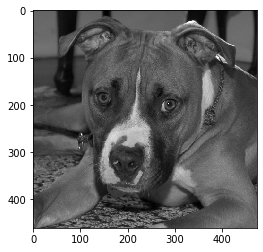

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os  # We use os to iterate through directories and join paths
import cv2

datadir='/content/PetImages'
categories=['Dog','Cat']

for category in categories:
    path=os.path.join(datadir,category)   #path to cat or dog directories
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

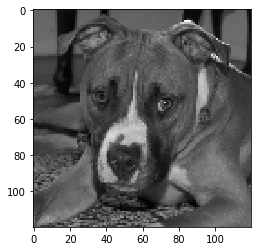

In [ ]:
img_size=120
new_array=cv2.resize(img_array,(img_size,img_size))  #We resize the all the images in a dataset to a common resolution
plt.imshow(new_array,cmap='gray')

In [ ]:
import time
training_data=[]

start=time.time()
def create_training_data():
    for category in categories:
        path = os.path.join(datadir, category)  # path to cat or dog directories
        class_num=categories.index(category)   # The classification wew map should be a number not a string such as cat or dog.
        # Hence we use the index of categories as 0 for Dogs and 1 for Cats. Refer line 7
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array,class_num])
            except Exception as e:     # If some image is broken and not recognized
                pass           
    
create_training_data() #After creating a training dataset we print the length 
end=time.time()
dataset_creating_time=end-start

In [ ]:
print(training_data[0])

[array([[142, 129,  52, ..., 109, 102,  83],
       [110, 135, 115, ..., 149,  89, 138],
       [150, 119,  93, ..., 198,  66, 169],
       ...,
       [ 62,  95,  94, ...,  62,  59,  46],
       [ 74,  90,  69, ...,  27,  49,  31],
       [ 60,  81,  70, ...,  59,  24,  39]], dtype=uint8), 0]


In [ ]:
print(len(training_data))

24946


In [ ]:
print(dataset_creating_time)

25.10166358947754


# **SHUFFLING AND TRAINING DATA**

In [ ]:
#For creating a good training of a model we shuffle our dataset

rstart=time.time()
import random
random.shuffle(training_data)
rend=time.time()

rtime=rend-rstart

In [ ]:
print(rend-rstart)

0.024830102920532227


In [ ]:
#Now after the dataset is shuffled we pack it into the variables before we feed it into our neural network

X=[]   #Generally X is our feature set and y is our labels
y=[]

In [ ]:
for features,label in training_data:
  X.append(features)   
  y.append(label)
  # We cannot pass a list to a neural network especially for features and hence we convert a list to a numpy array and pass it. Y can be a list but X has to be numpy array
X=np.array(X).reshape(-1,img_size,img_size,1)  #-1 implies how many features do we have. The final 1 is because it is a gray scale 

In [ ]:
import pickle

pickle_out=open("X.pickle","wb")   #WE use it to save the values of X and y
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [ ]:
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)

In [ ]:
X[1]  #It is the feature of the image and Y[1] world be the label for X[1]

array([[[108],
        [107],
        [119],
        ...,
        [ 28],
        [ 26],
        [ 30]],

       [[112],
        [ 97],
        [121],
        ...,
        [ 32],
        [ 26],
        [ 34]],

       [[126],
        [ 92],
        [116],
        ...,
        [ 30],
        [ 28],
        [ 30]],

       ...,

       [[175],
        [159],
        [142],
        ...,
        [206],
        [204],
        [215]],

       [[173],
        [162],
        [159],
        ...,
        [193],
        [196],
        [218]],

       [[176],
        [167],
        [155],
        ...,
        [191],
        [211],
        [230]]], dtype=uint8)

# **TRAINING OUR MODEL**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential   #Because we are going to use Sequential model
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D   #Because we are going to use a Dense Layer because a lot of times we are going to end in a fully connected dense layer.
# We use Flatten bcoz we feed the data to flatten before feeding to final dense layer
import pickle
import time


X=pickle.load(open("X.pickle","rb"))
y=pickle.load(open("y.pickle","rb"))

#Before we feed a data into a neural network we normalize the data. The easiest way to normalize the data is to scale that data. In our case we use image data so to scale image data we know 
# the max value(255) and min value(0). So we divide the image by 255 for normalizing

X=X/255.0

start=time.time()

model=Sequential()   #Because we are going to use Sequential model
model.add(     Conv2D(64,(3,3),input_shape=X.shape[1:]) )  #We start with the Convolutional layer. The second argument is the window 3*3. The last is oppposite of reshape(-1) 
#and input_shape is the shape of the data we are actually throwing in.

model.add(Activation("relu"))  #After covolution layer we can pass either an Activation or Pooling but here we pass a Activation layer.Activalion is relu(rectified linear)
model.add(MaxPooling2D(pool_size=(2,2)))



model.add( Conv2D(64,(3,3))  )  #We start with the Convolutional layer. The secong argument is the window 3*3. The last is oppposite of reshape(-1) 
model.add(Activation("relu"))  #After covolution layer we can pass either an Activation or Pooling but here we pass a Activation layer.Activalion is relu(rectified linear)
model.add(MaxPooling2D(pool_size=(2,2)))

#After executing the lines we got a 2 by 64 layer Convolutionl Neural Network

model.add(Flatten())                   # Before we add a dense layer we have to flatten it bcoz CNN is 2D and dense layer is 1D.This converts 3D feature map to 1D feature vectors
model.add(Dense(64))   #We add a final Dense layer and then flatten it.
model.add(Activation('relu'))     #Without activation function it becomes like a linear activation function which is useless in this case

model.add(Dense(1))  #This is the output layer we need atlast
model.add(Activation('sigmoid'))  

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X,y,batch_size=32,epochs=10,validation_split=0.1)  #We specify the batch size. This is how many at a time we got to pass. So it is better to have batch size between 20 adn 200 
#validation_split is a kind of out_of sample data which here is 10%

end=time.time()
training_time=end-start

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 22451 samples, validate on 2495 samples
Epoch 1/10
22451/22451 [==============================] - 615s 27ms/sample - loss: 0.6172 - acc: 0.6575 - val_loss: 0.5648 - val_acc: 0.7066
Epoch 2/10
22451/22451 [==============================] - 610s 27ms/sample - loss: 0.5021 - acc: 0.7545 - val_loss: 0.5099 - val_acc: 0.7435
Epoch 3/10
22451/22451 [==============================] - 608s 27ms/sample - loss: 0.4175 - acc: 0.8039 - val_loss: 0.4785 - val_acc: 0.7623
Epoch 4/10
22451/22451 [==============================] - 609s 27ms/sample - loss: 0.3297 - acc: 0.8546 - val_loss: 0.5198 - val_acc: 0.7539
Epoch 5/10
15328/22451 [===================>..........] - ETA: 3:08 - loss: 0.2120 - acc: 0.9154

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 22451 samples, validate on 2495 samples
Epoch 1/10
22451/22451 [==============================] - 615s 27ms/sample - loss: 0.6172 - acc: 0.6575 - val_loss: 0.5648 - val_acc: 0.7066
Epoch 2/10
22451/22451 [==============================] - 610s 27ms/sample - loss: 0.5021 - acc: 0.7545 - val_loss: 0.5099 - val_acc: 0.7435
Epoch 3/10
22451/22451 [==============================] - 608s 27ms/sample - loss: 0.4175 - acc: 0.8039 - val_loss: 0.4785 - val_acc: 0.7623
Epoch 4/10
22451/22451 [==============================] - 609s 27ms/sample - loss: 0.3297 - acc: 0.8546 - val_loss: 0.5198 - val_acc: 0.7539
Epoch 5/10
22451/22451 [==============================] - 612s 27ms/sample - loss: 0.2174 - acc: 0.9121 - val_loss: 0.5984 - val_acc: 0.7639
Epoch 6/10
Epoch 6/10
22451/22451 [==============================] - 61

In [ ]:
print(training_time)

6141.308701753616


In [ ]:
import cv2
import tensorflow as tf

categories=['Dog','Cat']

def prepare(filepath):
  img_size=120
  a=cv2.imread(filepath)
  a1=cv2.resize(a,(img_size,img_size))
  return a1.reshape(-1,img_size,img_size,1)

prediction=model.predict( [  prepare('/content/dog1.png')  ]   )
print(categories  [  int (prediction[0][0])   ]  )



Dog


In [ ]:
serial_execution_time= dataset_creating_time+ training_time + rtime
print(serial_execution_time)

6170.0937440395355


# PARALLEL EXECUTION 

In [ ]:
!pip install pillow

In [ ]:
import multiprocessing

multiprocessing.cpu_count()

2

In [ ]:
!apt -y install libcusparse8.0 libnvrtc8.0 libnvtoolsext1
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!pip install https://github.com/kmaehashi/chainer-colab/releases/download/2018-02-06/cupy_cuda80-4.0.0b3-cp36-cp36m-linux_x86_64.whl
!pip install 'chainer==4.0.0b3'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libcusparse8.0
E: Couldn't find any package by glob 'libcusparse8.0'
E: Couldn't find any package by regex 'libcusparse8.0'
E: Unable to locate package libnvrtc8.0
E: Couldn't find any package by glob 'libnvrtc8.0'
E: Couldn't find any package by regex 'libnvrtc8.0'
     |████████████████████████████████| 205.2MB 119kB/s 
     |████████████████████████████████| 368kB 5.2MB/s 
  Created wheel for chainer: filename=chainer-4.0.0b3-cp36-none-any.whl size=549016 sha256=92509e7d2662559f3508bfac79cf8c4a6626e52741d281153528fc709b89aef2
  Stored in directory: /root/.cache/pip/wheels/7a/e7/26/c13ce14e84f7f2a7209a31f5a1e327b8c681c5bcb3abcd0bec
Successfully built chainer
  Found existing installation: chainer 5.4.0
    Uninstalling chainer-5.4.0:
      Successfully uninstalled chainer-5.4.0


In [ ]:
datadir='/content/PetImages'
Dog_categories=['Dog']

p_training_data=[]

for category in Dog_categories:
    path=os.path.join(datadir,category)   #path to cat or dog directories
    imagePaths1=[os.path.join(path,img) for img in os.listdir(path)]
    
Cat_categories=['Cat']
for category in Cat_categories:
  path=os.path.join(datadir,category)
  imagePaths2=[os.path.join(path,img) for img in os.listdir(path)]


In [ ]:
#print(len(os.listdir(path)))


In [ ]:
#print(imagePaths1)

In [ ]:
#print(len(imagePaths1))

In [ ]:
#print(imagePaths2)

In [ ]:
#print(len(imagePaths2))

In [ ]:
imagePaths=imagePaths1+imagePaths2

In [ ]:
#print(len(imagePaths))

In [ ]:
print(imagePaths)

['/content/PetImages/Dog/10842.jpg', '/content/PetImages/Dog/1316.jpg', '/content/PetImages/Dog/6038.jpg', '/content/PetImages/Dog/2657.jpg', '/content/PetImages/Dog/6410.jpg', '/content/PetImages/Dog/7204.jpg', '/content/PetImages/Dog/7679.jpg', '/content/PetImages/Dog/5574.jpg', '/content/PetImages/Dog/3692.jpg', '/content/PetImages/Dog/5050.jpg', '/content/PetImages/Dog/7498.jpg', '/content/PetImages/Dog/2102.jpg', '/content/PetImages/Dog/10667.jpg', '/content/PetImages/Dog/6939.jpg', '/content/PetImages/Dog/2334.jpg', '/content/PetImages/Dog/3163.jpg', '/content/PetImages/Dog/8511.jpg', '/content/PetImages/Dog/3334.jpg', '/content/PetImages/Dog/1835.jpg', '/content/PetImages/Dog/8613.jpg', '/content/PetImages/Dog/2018.jpg', '/content/PetImages/Dog/5867.jpg', '/content/PetImages/Dog/10539.jpg', '/content/PetImages/Dog/2004.jpg', '/content/PetImages/Dog/3745.jpg', '/content/PetImages/Dog/4770.jpg', '/content/PetImages/Dog/10269.jpg', '/content/PetImages/Dog/10447.jpg', '/content/PetI

In [ ]:
print(imagePaths[12500])

/content/PetImages/Dog/2597.jpg


In [ ]:
imagPaths=imagePaths1

In [ ]:
try_img

['/content/PetImages/Dog/6662.jpg',
 '/content/PetImages/Dog/8807.jpg',
 '/content/PetImages/Dog/6878.jpg',
 '/content/PetImages/Dog/5293.jpg',
 '/content/PetImages/Dog/438.jpg']

# **TRAINING SET CREATOR**

In [ ]:
from scipy import ndimage, misc

In [ ]:
!--NotebookApp.iopub_data_rate_limit.



# **DOG DATASET**

In [ ]:
classifier=0

In [ ]:
from multiprocessing import Pool
import os
import cv2
import time


p_dog_training_data=[]
start=time.time()

def import_training_set(args):

    c=0
    global classifier
    classifier+=1
    index,imagePath,new_image_size = args
    # Reads the image
    image = cv2.imread(imagePath,cv2.IMREAD_GRAYSCALE)
    
    try:
      input_vector = cv2.resize(image,new_image_size)
      

      p_dog_training_data.append([input_vector,0])
      return p_dog_training_data
     
    except Exception as e:
      c+=1
    
new_image_size = 120,120
number_of_parallel_processes = 2  

ans1=Pool(number_of_parallel_processes).map(import_training_set,[(i,img,new_image_size) for i,img in enumerate(imagePaths1)])

end=time.time()

p_dog_dataset_creating_time=end-start

In [ ]:
print(p_dog_dataset_creating_time)

12.10872220993042


# **CAT DATASET**

In [ ]:
from multiprocessing import Pool
import os
import cv2
import time


p_cat_training_data=[]
start=time.time()

def import_training_set(args):

    c=0
    global classifier
    classifier+=1
    index,imagePath,new_image_size = args
    # Reads the image
    image = cv2.imread(imagePath,cv2.IMREAD_GRAYSCALE)
    
    try:
      input_vector = cv2.resize(image,new_image_size)
      

      p_cat_training_data.append([input_vector,1])
      return p_cat_training_data
     
    except Exception as e:
      c+=1
    
new_image_size = 120,120
number_of_parallel_processes = 2  

ans2=Pool(number_of_parallel_processes).map(import_training_set,[(i,img,new_image_size) for i,img in enumerate(imagePaths2)])

end=time.time()

p_cat_dataset_creating_time=end-start

In [ ]:
print(p_cat_dataset_creating_time)

11.661296844482422


In [ ]:
total_time=p_cat_dataset_creating_time + p_dog_dataset_creating_time
print(total_time)

23.770019054412842


# **COMBINED TRY**

In [ ]:
from multiprocessing import Pool
import os
import cv2
import time


p_training_data=[]

start=time.time()

def import_training_set(args):

    c=0
    global classifier
    classifier+=1
    index,imagePath,new_image_size = args
    # Reads the image
    image = cv2.imread(imagePath,cv2.IMREAD_GRAYSCALE)
    
    try:
      input_vector = cv2.resize(image,new_image_size)
      
      if(index<=12500):
        p_training_data.append([input_vector,0])    
      else:
        p_training_data.append([input_vector,1])   
   
      return p_training_data
     
    except Exception as e:
      c+=1
    
new_image_size = 120,120
number_of_parallel_processes = 2  

ans=Pool(number_of_parallel_processes).map(import_training_set,[(i,img,new_image_size) for i,img in enumerate(imagePaths)])
training_set=ans

end=time.time()

p_dataset_creating_time=end-start

In [ ]:
print(p_dataset_creating_time)

23.60081386566162


In [ ]:
X1=[]   #X1 is our feature set and y1 is our labels of our parallel dataset
y1=[]

In [ ]:
for features,label in training_data:
  X1.append(features)   
  y1.append(label)
  # We cannot pass a list to a neural network especially for features and hence we convert a list to a numpy array and pass it. Y can be a list but X has to be numpy array
X1=np.array(X1).reshape(-1,img_size,img_size,1)  #-1 implies how many features do we have. The final 1 is because it is a gray scale 

In [ ]:
import pickle

pickle_out=open("X1.pickle","wb")   #WE use it to save the values of X and y
pickle.dump(X1,pickle_out)
pickle_out.close()

pickle_out=open("y1.pickle","wb")
pickle.dump(y1,pickle_out)
pickle_out.close()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential   #Because we are going to use Sequential model
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D   #Because we are going to use a Dense Layer because a lot of times we are going to end in a fully connected dense layer.
# We use Flatten bcoz we feed the data to flatten before feeding to final dense layer
import pickle
import time

X1=pickle.load(open("X1.pickle","rb"))
y1=pickle.load(open("y1.pickle","rb"))

#Before we feed a data into a neural network we normalize the data. The easiest way to normalize the data is to scale that data. In our case we use image data so to scale image data we know 
# the max value(255) and min value(0). So we divide the image by 255 for normalizing

X1=X1/255.0

start=time.time()

model=Sequential()   #Because we are going to use Sequential model

model.add(Conv2D(64,(3,3),input_shape=X1.shape[1:]) )  #We start with the Convolutional layer. The second argument is the window 3*3. The last is oppposite of reshape(-1) 
#and input_shape is the shape of the data we are actually throwing in.

model.add(Activation("relu"))  #After covolution layer we can pass either an Activation or Pooling but here we pass a Activation layer.Activalion is relu(rectified linear)
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3))  )  #We start with the Convolutional layer. The secong argument is the window 3*3. The last is oppposite of reshape(-1) 
model.add(Activation("relu"))  #After covolution layer we can pass either an Activation or Pooling but here we pass a Activation layer.Activalion is relu(rectified linear)
model.add(MaxPooling2D(pool_size=(2,2)))

#After executing the lines we got a 2 by 64 layer Convolutionl Neural Network

model.add(Flatten())                   # Before we add a dense layer we have to flatten it bcoz CNN is 2D and dense layer is 1D.This converts 3D feature map to 1D feature vectors
model.add(Dense(64))   #We add a final Dense layer and then flatten it.
model.add(Activation('relu'))     #Without activation function it becomes like a linear activation function which is useless in this case

model.add(Dense(1))  #This is the output layer we need atlast
model.add(Activation('sigmoid'))  

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X,y,batch_size=20,epochs=10,validation_split=0.1)  #We specify the batch size. This is how many at a time we got to pass. So it is better to have batch size between 20 adn 200 
#validation_split is a kind of out_of sample data which here is 10%

end=time.time()
p_training_time=end-start

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 22451 samples, validate on 2495 samples
Epoch 1/10
22451/22451 [==============================] - 605s 27ms/sample - loss: 1.9937 - acc: 0.5215 - val_loss: 0.6920 - val_acc: 0.5038
Epoch 2/10
22451/22451 [==============================] - 603s 27ms/sample - loss: 0.6833 - acc: 0.5450 - val_loss: 0.6958 - val_acc: 0.5387
Epoch 3/10
22451/22451 [==============================] - 605s 27ms/sample - loss: 0.6577 - acc: 0.5818 - val_loss: 0.7409 - val_acc: 0.5467
Epoch 4/10
22451/22451 [==============================] - 606s 27ms/sample - loss: 0.6350 - acc: 0.5967 - val_loss: 0.7491 - val_acc: 0.5455
Epoch 5/10
22451/22451 [==============================] - 607s 27ms/sample - loss: 0.6061 - acc: 0.6245 - val_loss: 0.8808 - val_acc: 0.5371
Epoch 6/10
22451/22451 [==============================] - 605s 27ms/sam

In [ ]:
print(p_training_time)

6044.832716464996


In [ ]:
parallel_execution_time=p_dataset_creating_time+p_training_time
print(parallel_execution_time)

6068.433530330658


In [ ]:
import cv2
import tensorflow as tf

categories=['Dog','Cat']

def prepare(filepath):
  img_size=120
  a=cv2.imread(filepath)
  a1=cv2.resize(a,(img_size,img_size))
  return a1.reshape(-1,img_size,img_size,1)

prediction=model.predict( [  prepare('/content/dog1.png')  ]   )
print(categories  [  int (prediction[0][0])   ]  )

Dog


# **TRY BLOCK**

In [ ]:
print(ans[0])

In [ ]:
from multiprocessing import Pool
import os
import cv2
import time


p_training_data=[]
start=time.time()

def import_training_set(args):

    c=0
    global classifier
    classifier+=1
    index,imagePath,new_image_size = args
    # Reads the image
    image = cv2.imread(imagePath,cv2.IMREAD_GRAYSCALE)
    
    try:
      input_vector = cv2.resize(image,new_image_size).flatten()
      
      for i in range(0,5):
        print("i=",i)
        print("input vector=",input_vector)
        print(input_vector.shape)
        break
      
        p_training_data.append([input_vector,1])
        
      return p_training_data
      
    
    
    except Exception as e:
      c+=1


new_image_size = 120,120

number_of_parallel_processes = 2


ans1 = Pool(number_of_parallel_processes).map(import_training_set,[(i,img,new_image_size) for i,img in enumerate(imagePaths1)])

end=time.time()

p_dog_dataset_creating_time=end-start

In [ ]:
import numpy as np
o=np.array(training_set)
o.shape

#print(training_set[1].shape);

(25002,)

In [ ]:
print(p_dataset_creating_time)

24.400545835494995


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os  # We use os to iterate through directories and join paths
import cv2
#path to cat or dog directories
for img in imagePaths:
  print(type(img))
  img_array=cv2.imread(img,cv2.IMREAD_GRAYSCALE)
  new_img=cv2.resize(img_array,(120,120))
  plt.imshow(new_img,cmap='gray')
  plt.show()
  break
    

In [ ]:
from multiprocessing import Pool
import os
import cv2
import time


import time
p_training_data=[]

start=time.time()

def p_create_training_data():
    for category in categories:
        path = os.path.join(datadir, category)  # path to cat or dog directories
        class_num=categories.index(category)   # The classification wew map should be a number not a string such as cat or dog.
        # Hence we use the index of categories as 0 for Dogs and 1 for Cats. Refer line 7
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                p_training_data.append([new_array,class_num])
            except Exception as e:     # If some image is broken and not recognized
                pass           
    
number_of_parallel_processes = 7



ans = Pool(number_of_parallel_processes).map(p_create_training_data())
end=time.time()

p_dataset_creating_time=end-start

In [ ]:
c=0;

In [ ]:
from multiprocessing import Pool

start=time.time()
def import_training_set(args):
   
    
    global c
    c+=1
    index,imagePath,new_image_size = args

    
    # Reads the image
    try:
      image = cv2.imread(imagePath,cv2.IMREAD_GRAYSCALE)
      
      filename = imagePath.split(os.path.sep)[-1]

   
      label = filename.split(".")[0]

   
      original_index = filename.split(".")[1]

    
      input_vector = cv2.resize(image,new_image_size).flatten()

      if(index<12501):
        return [0,input_vector]
      else:
        return [1,input_vector]
      
   
    except Exception as e:
      c+=1


new_image_size = 120,120

number_of_parallel_processes = 2


ans = Pool(number_of_parallel_processes).map(import_training_set,[(i,img,new_image_size)
                                                                  for i,img in enumerate(imagePaths)])


training_set = ans



end=time.time()

p_dataset_creating_time=end-start

In [ ]:
print(training_set.shape)

In [ ]:
print(p_dataset_creating_time)

24.52022671699524


In [ ]:
print(training_set[1])

[0, array([37, 43, 71, ..., 37, 56, 59], dtype=uint8)]


In [ ]:
dict=()

unique_labels = set( [i[1] for i in training_set.values()] )
labels2int = {j:i for i,j in enumerate(unique_labels)}
labels = [labels2int[i[1]] for i in training_set.values()]

In [ ]:
from multiprocessing import Pool
import os
import cv2
import time


p_training_data=[]
start=time.time()

def import_training_set(args):

    c=0
    global classifier
    classifier+=1
    index,imagePath,new_image_size = args
    # Reads the image
    image = cv2.imread(imagePath,cv2.IMREAD_GRAYSCALE)
    
    try:
      input_vector = cv2.resize(image,new_image_size)      
      if(classifier<=12501):
        p_training_data.append([input_vector,0])
      else:
        p_training_data.append([input_vector,1])
    
      return p_training_data
     
    except Exception as e:
      c+=1
    
new_image_size = 120,120
number_of_parallel_processes = 2  

ans=Pool(number_of_parallel_processes).map(import_training_set,[(i,img,new_image_size) for i,img in enumerate(try_img)])

In [ ]:
print(ans[0])

In [ ]:
print(training_data[3])

In [ ]:
X1=[]
y1=[]

In [ ]:
for i in training_set:
  if i is not None:
    for j in i:
      if j is not None:
        X1.append(j[0])   
        y1.append(j[1])
  # We cannot pass a list to a neural network especially for features and hence we convert a list to a numpy array and pass it. Y can be a list but X has to be numpy array
X1=np.array(X1).reshape(-1,img_size,img_size,1)  #-1 implies how many features do we have. The final 1 is because it is a gray scale 